# OpenEO Connection to Google Earth Engine

In [1]:
import openeo
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
# Define constants

# Connection
GEE_DRIVER_URL = "http://127.0.0.1:8080"
OUTPUT_FILE = "/tmp/openeo_gee_output.png"
OUTFORMAT = "png"

# Data
PRODUCT_ID = "COPERNICUS/S2"

DATE_START = "2017-01-01"
DATE_END = "2017-01-31"

IMAGE_LEFT = 9.0
IMAGE_RIGHT = 9.1
IMAGE_TOP = 12.1
IMAGE_BOTTOM = 12.0
IMAGE_SRS = "EPSG:4326"

# Processes
NDVI_RED = "B4"
NDVI_NIR = "B8"

STRECH_COLORS_MIN = -1
STRECH_COLORS_MAX = 1

In [3]:
# Connect with GEE backend
session = openeo.session("nobody", GEE_DRIVER_URL)
session

In [4]:
# Get available processes from the back end.
processes = session.get_all_processes()
processes

[{'process_id': 'NDVI',
  'description': 'Finds the minimum value of time series for all bands of the input dataset.'},
 {'process_id': 'filter_bbox',
  'description': 'Drops observations from a collection that are located outside of a given bounding box.'},
 {'process_id': 'filter_daterange',
  'description': 'Drops observations from a collection that have been captured before a start or after a given end date.'},
 {'process_id': 'max_time',
  'description': 'Finds the maximum value of time series for all bands of the input dataset.'},
 {'process_id': 'min_time',
  'description': 'Finds the minimum value of time series for all bands of the input dataset.'},
 {'process_id': 'stretch_colors', 'description': 'Color stretching'}]

In [5]:
# Get detailed information about process from the back end.
process = session.get_process('NDVI')
process

{'process_id': 'NDVI',
 'description': 'Finds the minimum value of time series for all bands of the input dataset.',
 'args': {'imagery': {'description': 'image or image collection'},
  'red': {'description': 'reference to the red band'},
  'nir': {'description': 'reference to the nir band'}}}

In [6]:
# Retrieve the list of available collections
collections = session.imagecollections()

list(collections)[:5]

[{'product_id': 'ASTER/AST_L1T_003',
  'description': 'ASTER L1T Radiance',
  'source': 'NASA LP DAAC at the USGS EROS Center, https://lpdaac.usgs.gov/dataset_discovery/aster/aster_products_table/ast_l1t'},
 {'product_id': 'AU/GA/AUSTRALIA_5M_DEM',
  'description': 'Australian 5M DEM',
  'source': 'Geoscience Australia, https://ecat.ga.gov.au/geonetwork/srv/eng/search#!22be4b55-2465-4320-e053-10a3070a5236'},
 {'product_id': 'CIESIN/GPWv4/population-count',
  'description': 'Gridded Population of the World, Version 4 (GPWv4): Population Count',
  'source': 'CIESIN, http://sedac.ciesin.columbia.edu/data/collection/gpw-v4'},
 {'product_id': 'CIESIN/GPWv4/population-density',
  'description': 'Gridded Population of the World, Version 4 (GPWv4): Population Density',
  'source': 'CIESIN, http://sedac.ciesin.columbia.edu/data/collection/gpw-v4'},
 {'product_id': 'CIESIN/GPWv4/unwpp-adjusted-population-count',
  'description': 'Gridded Population of the World, Version 4 (GPWv4): UN-Adjusted Po

In [7]:
# Select collection product
coperincus_s2_image = session.image(PRODUCT_ID)

coperincus_s2_image

In [8]:
# Specifying the date range and the bounding box
timeseries = coperincus_s2_image.bbox_filter(left=IMAGE_LEFT, right=IMAGE_RIGHT, top=IMAGE_TOP,
                                             bottom=IMAGE_BOTTOM, srs=IMAGE_SRS)
timeseries = timeseries.date_range_filter(DATE_START, DATE_END)

timeseries

In [9]:
# Applying some operations on the data
timeseries = timeseries.ndvi(NDVI_RED, NDVI_NIR)
timeseries = timeseries.min_time()
timeseries = timeseries.stretch_colors(STRECH_COLORS_MIN, STRECH_COLORS_MAX)

timeseries

In [10]:
# Sending the job to the backend
job = timeseries.send_job(out_format=OUTFORMAT)

job

In [11]:
# Download job result
job.download(OUTPUT_FILE)

job

ConnectionAbortedError: {}

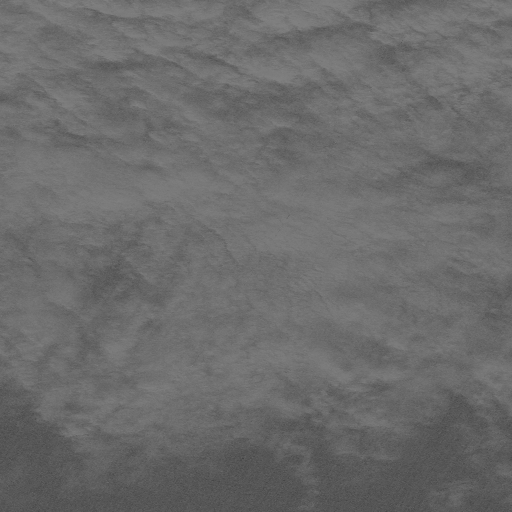

In [12]:
# Showing the result
from IPython.display import Image
result = Image(filename=OUTPUT_FILE)

result